<a href="https://colab.research.google.com/github/datavzch/GANWS21/blob/main/Simple_GAN_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**


In [ ]:
%matplotlib inline
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt


# **Define Discriminator and Generator**

In [ ]:
#Input: Two real values (a sample)
#Output: Classification (True or False, 0.0 - 1.0) 

def define_discriminator(n_inputs= 2):
    model = keras.models.Sequential()  #Groups a linear stack of layers to the model https://www.tensorflow.org/api_docs/python/tf/keras/Model
    
    model.add(keras.layers.Dense(units= 50, #Regular densely-connected NN layer https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
                                 activation= 'relu', #Activation function - It takes in the output signal and converts it into some form that can be taken as the next input
                                 input_dim= n_inputs,
                                 kernel_initializer= 'he_uniform')) #Recomended for RELU
    model.add(keras.layers.Dense(units= 1,  #Regular densely-connected NN layer 
                                 activation= 'sigmoid')) #Activation function
    model.compile(loss= 'binary_crossentropy',  #Configure model for trainning  - returns a weighted loss float tensor
                  optimizer= 'adam', #https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
                  metrics= ['accuracy']) #Calculates how often predictions match binary labels - returns prediction accurary
    
    return model

In [ ]:
£#Input: Latent space point  -  random numbers
#Output: A generated sample of two real values 

def define_generator(latent_dim, n_outputs= 2):
    model = keras.models.Sequential() #Groups a linear stack of layers to the model https://www.tensorflow.org/api_docs/python/tf/keras/Model
    model.add(keras.layers.Dense(units= 20, 
                                 input_dim= latent_dim, 
                                 activation= 'relu', #Activation function - It takes in the output signal and converts it into some form that can be taken as the next input
                                 kernel_initializer= 'he_uniform')) #Recomended for RELU
    model.add(keras.layers.Dense(units= n_outputs, 
                                 activation= 'linear')) 
    
    return model

# **Define GAN**

In [ ]:
def define_gan(generator, discriminator):
    discriminator.trainable = False 
    model = keras.models.Sequential() 
    model.add(generator) # Add generator to model
    model.add(discriminator) # Add discriminator to model
    model.compile(loss= 'binary_crossentropy', optimizer= 'adam') #Configure model for trainning  - returns a weighted loss float tensor
    
    return model

# **Generate Sample**

In [ ]:
def generate_real_sample(n): # Generating our input / Dataset 
    X1 = np.random.rand(n) - 0.5 # Generating a random value between -0.5 and 0.5
    X2 = X1 * X1 # X^2
    X1 = X1.reshape((n, 1))
    X2 = X2.reshape((n, 1))
    X = np.hstack((X1, X2)) # Stacked array of original X1 value and X^2
    y = np.ones((n, 1)) # Label (1) Real Values
    return X, y 

In [ ]:
def generate_latent_points(latent_dim, n): 
    x_input = np.random.rand(latent_dim * n) #Generate noise (Random numbers based on latent_dim and n)
    x_input = x_input.reshape((n, latent_dim))
    return x_input

In [ ]:
def generate_fake_sample(generator, latent_dim, n): #Generating fake samples - Random numbers 
    x_input = generate_latent_points(latent_dim, n) 
    X = generator.predict(x_input)  #Generates predictions for the input samples.
    y = np.zeros((n, 1)) #Label (0) Fake Values
    return X, y

# **Summarize Performance**

In [ ]:
#Visualizing training results
def summarize_performance(epoch, generator, discriminator, latent_dim, n = 100): #Plotting Performance 
    X_real, y_real = generate_real_sample(n)
    X_fake, y_fake = generate_fake_sample(generator= generator,
                                          latent_dim= latent_dim,
                                          n = n)
    _, acc_real = discriminator.evaluate(X_real, y_real, verbose= 0) # Getting prediction from real samples
    _, acc_fake = discriminator.evaluate(X_fake, y_fake, verbose= 0) # Getting prediction from fake samples
    print(f'Epoch: {epoch + 1}, Acc_real: {acc_real}, Acc_fake: {acc_fake}') 
    plt.scatter(X_real[:,0], X_real[:,1], color= 'red') #Selecting red color for real values
    plt.scatter(X_fake[:,0], X_fake[:,1], color= 'blue') #Selecting blue colors for fake values
    file_name= f'Eval_Epoch{epoch + 1}.png' #Creating image
    plt.savefig(file_name) #Saving Image
    plt.show() #Showing plot
    plt.close()

# **Model Training**

In [ ]:
def train(g_model, d_model, GAN_model, latent_dim, n_batch= 256, epochs = 50000): # Definning Training function
    half_batch = int(n_batch / 2) 
    for i in range(epochs): #for every epoch
        X_real, y_real = generate_real_sample(half_batch) # Generate real samples
        X_fake, y_fake = generate_fake_sample(generator= g_model, # Generate fake samples
                                              latent_dim= latent_dim, 
                                              n= half_batch)
        d_model.train_on_batch(X_real, y_real) # Train Discriminator on real samples  - Runs a single update on a single batch of data.
        d_model.train_on_batch(X_fake, y_fake) # Train Discriminator on fake samples - Runs a single update on a single batch of data.
        
        X_gan = generate_latent_points(latent_dim, n_batch) #generate latent points 
        y_gan = np.ones((n_batch, 1)) #generate labels
        GAN_model.train_on_batch(X_gan, y_gan) #
        
        if (i+1)%5000 == 0: # Every 5000 Print and Plot Results of epoch
            summarize_performance(epoch= i,  
                                  generator= g_model,
                                  discriminator= d_model,
                                  latent_dim= latent_dim)

Epoch: 5000, Acc_real: 0.8299999833106995, Acc_fake: 0.07000000029802322


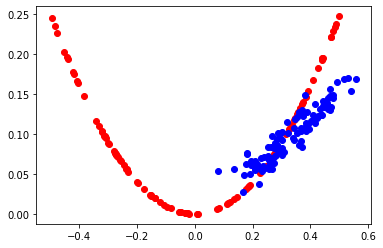

Epoch: 10000, Acc_real: 0.8299999833106995, Acc_fake: 0.0


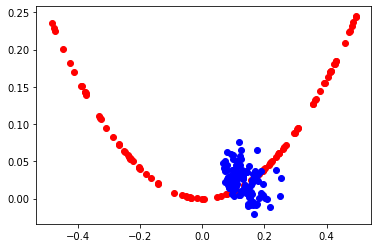

Epoch: 15000, Acc_real: 0.3199999928474426, Acc_fake: 1.0


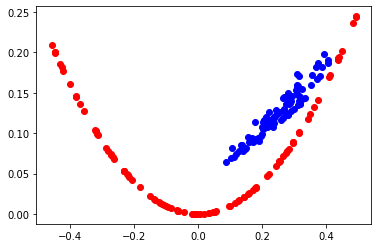

Epoch: 20000, Acc_real: 0.5099999904632568, Acc_fake: 0.4699999988079071


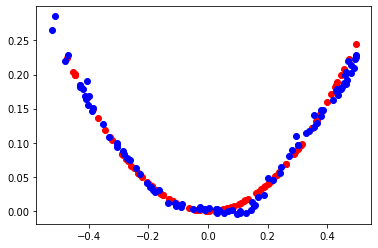

Epoch: 25000, Acc_real: 0.3499999940395355, Acc_fake: 0.6499999761581421


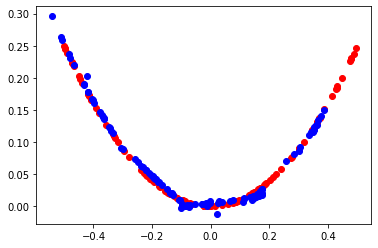

Epoch: 30000, Acc_real: 0.49000000953674316, Acc_fake: 0.38999998569488525


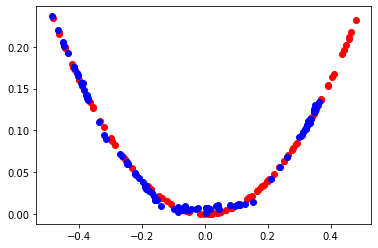

In [ ]:
#start Trainning - It takes time. depending on your machine it can take up to 10 to 20 minutes to visualize some result
latent_dim = 5
gen_model = define_generator(latent_dim= latent_dim)
dis_model = define_discriminator()
gan_model = define_gan(gen_model, dis_model)
train(g_model= gen_model, d_model= dis_model, GAN_model= gan_model, latent_dim= latent_dim)

# **Modify Input to change Output Graph**

In [ ]:
# New Input 
def generate_real_sample(n):
    X1 = np.random.rand(n) - 0.5 # Generates random numbers - Determines the direction of the output graph
    X2 = X1 * X1 # One Dimensional Function - Determines the Shape of the output
    X1 = X1.reshape((n, 1))
    X2 = X2.reshape((n, 1))
    X = np.hstack((X1, X2))
    y = np.ones((n, 1))
    return X, y

In [ ]:
# Generate new Output 
# Remember Trainning takes time. depending on your machine it can take up to 10 to 20 minutes to visualize some result

latent_dim = 5
gen_model = define_generator(latent_dim= latent_dim)
dis_model = define_discriminator()
gan_model = define_gan(gen_model, dis_model)
train(g_model= gen_model, d_model= dis_model, GAN_model= gan_model, latent_dim= latent_dim)